# Mini Project : Sentiment Analysis with Random Forest Classifier

In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Read the training data and validation data, create the data frame with read_csv().
!pip install kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 71.3MB/s]


In [ ]:
!unzip emotions-dataset-for-nlp.zip

Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


In [ ]:
train_df = pd.read_csv("train.txt",
                 delimiter=';', header=None, names=['sentence','label'])

val_df = pd.read_csv("val.txt",
                 delimiter=';', header=None, names=['sentence','label'])

In [ ]:
train_df.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
val_df.head()

,sentence,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


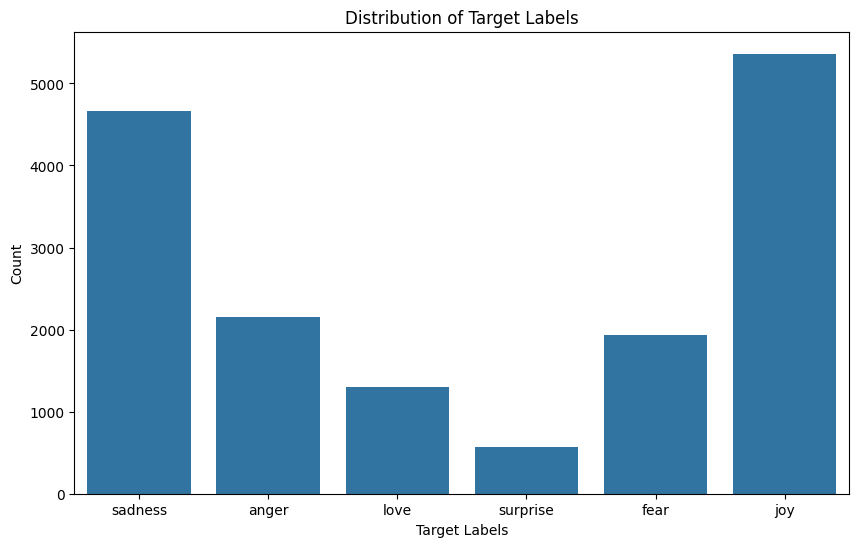

In [ ]:
# Check for the various target labels using seaborn
# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_df)

# Add labels and title
plt.xlabel('Target Labels')
plt.ylabel('Count')
plt.title('Distribution of Target Labels')

# Show the plot
plt.show()

## Preprocess the data to get rid of any characters apart from alphabets, convert the string to lowercase, check for stopwords in the data and get rid of them and perform lemmatization on each word

In [ ]:
!pip install nltk
!pip install spacy

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Function to perform text preprocessing
def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub("[^a-zA-Z]", " ", text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization using NLTK
    tokens = nltk.word_tokenize(text)

    # Lemmatization and remove stopwords
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words("english")]

    # Join the lemmatized tokens to form the processed text
    processed_text = " ".join(lemmatized_tokens)

    return processed_text

In [ ]:
# Apply the preprocess_text function to each row in the 'sentence' column
train_df['processed_sentence'] = train_df['sentence'].apply(preprocess_text)

# Display the updated DataFrame with the processed text
print("\nDataFrame after preprocessing:")
train_df[['sentence', 'processed_sentence', 'label']].head()


DataFrame after preprocessing:


,sentence,processed_sentence,label
0,i didnt feel humiliated,didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...,love
4,i am feeling grouchy,feeling grouchy,anger


## Use Random Forest Classifier to train your data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'processed_sentence' is the column containing preprocessed text
X = train_df['processed_sentence']
y = train_df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

       anger       0.85      0.90      0.87       427
        fear       0.85      0.85      0.85       397
         joy       0.90      0.92      0.91      1021
        love       0.84      0.76      0.80       296
     sadness       0.94      0.91      0.92       946
    surprise       0.74      0.78      0.76       113

    accuracy                           0.89      3200
   macro avg       0.85      0.85      0.85      3200
weighted avg       0.89      0.89      0.89      3200


Confusion Matrix:
[[385  11  11   2  16   2]
 [ 21 338   7   2   8  21]
 [  7  10 942  30  27   5]
 [  5   4  60 225   2   0]
 [ 36  21  19   8 859   3]
 [  0  15   6   1   3  88]]


## Tune the model hyperparameters using GridSearchCV, RandomSearchCV, and Bayesian optimization. Document the configurations and results of each method.

In [ ]:
!pip install scikit-learn scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter search space for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_vectorized, y)

# Print results of GridSearchCV
print("Grid Search Results:")
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Hyperparameter search space for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_vectorized, y)

# Print results of RandomizedSearchCV
print("\nRandomized Search Results:")
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Hyperparameter search space for BayesSearchCV
param_bayes = {
    'n_estimators': (50, 150),
    'max_depth': (1, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

# Perform BayesSearchCV
bayes_search = BayesSearchCV(rf_classifier, search_spaces=param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_vectorized, y)

# Print results of BayesSearchCV
print("\nBayesian Search Results:")
print("Best Parameters:", bayes_search.best_params_)
print("Best Accuracy:", bayes_search.best_score_)


Grid Search Results:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best Accuracy: 0.8883125

Randomized Search Results:
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best Accuracy: 0.8875


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist


Bayesian Search Results:
Best Parameters: OrderedDict([('max_depth', 30), ('min_samples_leaf', 1), ('min_samples_split', 3), ('n_estimators', 53)])
Best Accuracy: 0.5707500000000001


## Read and preprocess the test data similarly to the training data.

In [ ]:
# Display the first few rows of the test DataFrame
print("Original Test DataFrame:")
print(val_df.head())

# Apply the preprocess_text function to each row in the 'sentence' column of the test data
val_df['processed_sentence'] = val_df['sentence'].apply(preprocess_text)

# Display the updated test DataFrame with the processed text
print("\nTest DataFrame after preprocessing:")
val_df[['sentence', 'processed_sentence']].head()

Original Test DataFrame:
                                            sentence    label  \
0  im feeling quite sad and sorry for myself but ...  sadness   
1  i feel like i am still looking at a blank canv...  sadness   
2                     i feel like a faithful servant     love   
3                  i am just feeling cranky and blue    anger   
4  i can have for a treat or if i am feeling festive      joy   

                                  processed_sentence  
0           im feeling quite sad sorry ill snap soon  
1  feel like still looking blank canvas blank pie...  
2                         feel like faithful servant  
3                                feeling cranky blue  
4                              treat feeling festive  

Test DataFrame after preprocessing:


,sentence,processed_sentence
0,im feeling quite sad and sorry for myself but ...,im feeling quite sad sorry ill snap soon
1,i feel like i am still looking at a blank canv...,feel like still looking blank canvas blank pie...
2,i feel like a faithful servant,feel like faithful servant
3,i am just feeling cranky and blue,feeling cranky blue
4,i can have for a treat or if i am feeling festive,treat feeling festive


## Evaluate the model on the test data using metrics like Accuracy Score, Precision Score, Recall Score, and Confusion Matrix. Create a ROC curve for visual evaluation.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np

# Assuming 'processed_sentence' is the column containing preprocessed text in the test data
X_test_processed = vectorizer.transform(val_df['processed_sentence'])
y_test_true = val_df['label']

n_classes = len(np.unique(val_df['label']))

# Predictions on the test set using the trained Random Forest Classifier
y_test_pred = rf_classifier.predict(X_test_processed)

# Accuracy Score
accuracy = accuracy_score(y_test_true, y_test_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision Score
precision = precision_score(y_test_true, y_test_pred, average='weighted')
print(f"Precision: {precision:.2f}")

# Recall Score
recall = recall_score(y_test_true, y_test_pred, average='weighted')
print(f"Recall: {recall:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_true, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_test_true = (val_df['label'] == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_test_true, y_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_df['label'].values, y_test_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=2, label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter search space for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vectorized, y_train)

# Get best hyperparameters and evaluate on the test set
best_rf_grid = grid_search.best_estimator_
y_test_pred_grid = best_rf_grid.predict(X_test_vectorized)

# Hyperparameter search space for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_vectorized, y_train)

# Get best hyperparameters and evaluate on the test set
best_rf_random = random_search.best_estimator_
y_test_pred_random = best_rf_random.predict(X_test_vectorized)

# Hyperparameter search space for BayesSearchCV
param_bayes = {
    'n_estimators': (50, 150),
    'max_depth': (1, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

# Perform BayesSearchCV
bayes_search = BayesSearchCV(rf_classifier, search_spaces=param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_train_vectorized, y_train)

# Get best hyperparameters and evaluate on the test set
best_rf_bayes = bayes_search.best_estimator_
y_test_pred_bayes = best_rf_bayes.predict(X_test_vectorized)

# Evaluate and compare the performance of different models
print("Grid Search Results:")
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred_grid))
print()

print("Randomized Search Results:")
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred_random))
print()

print("Bayesian Search Results:")
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred_bayes))
